# Full Pipeline

In [1]:
import sys
sys.path.append('../script/')
from prepare_training_data import DataPreparation
from results_visualisation import ResultsEvaluation, ResultsVisualisation

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 236.5/460.4 GB disk)


## Data preparation

In [2]:
images_path = '../data/all_images/'
annotation_path = "../data/train_annotation/"
annotation_filename = "_annotation.csv"
data = DataPreparation(images_path, annotation_path, annotation_filename, (640,640))
data.import_annotation()
data.scaling()
data.preparing_data_for_YOLO()

In [3]:
data.annotation_completed

,im_name,class,x_min,y_min,x_max,y_max,models,x_mid,y_mid,w,h
0,1000407040.jpg,1,11.200000,66.560000,627.200000,576.000000,Toyota Sequoia SUV 2012,0.498750,0.502000,0.962500,0.796000
1,1000472576.jpg,1,30.052174,122.469136,577.669565,588.641975,Toyota Sequoia SUV 2012,0.474783,0.555556,0.855652,0.728395
2,1000669184.jpg,1,7.680000,125.968254,638.720000,581.079365,Toyota Sequoia SUV 2012,0.505000,0.552381,0.986000,0.711111
3,1000800256.jpg,1,87.040000,43.389831,576.000000,602.033898,Toyota Sequoia SUV 2012,0.518000,0.504237,0.764000,0.872881
4,1001324544.jpg,1,44.000000,99.555556,544.000000,522.666667,Toyota Sequoia SUV 2012,0.459375,0.486111,0.781250,0.661111
...,...,...,...,...,...,...,...,...,...,...,...
2340,993853440.jpg,1,33.750000,75.900439,571.875000,453.528551,Suzuki SX4 Sedan 2012,0.473145,0.413616,0.840820,0.590044
2341,994246656.jpg,1,36.800000,135.466667,540.000000,513.066667,Suzuki SX4 Sedan 2012,0.450625,0.506667,0.786250,0.590000
2342,999489536.jpg,1,50.000000,185.534407,587.500000,546.295754,Toyota Sequoia SUV 2012,0.498047,0.571742,0.839844,0.563690
2343,999686144.jpg,1,82.133333,244.184615,563.200000,584.861538,Toyota Sequoia SUV 2012,0.504167,0.647692,0.751667,0.532308


In [4]:
data.download_data_for_training("../data/data_YOLO")

## Prédiction avec le modèle entrainé sur google colab

In [5]:
path_weights = "../trained_models/weights2/best.pt"
model = YOLO(path_weights)

In [7]:
path_images_test = "../data/data_YOLO/val/images/"
results=model.predict(source=path_images_test,conf=0.25, save = True, project = "../logs")


image 1/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1005518848.jpg: 640x640 1 Car, 184.7ms
image 2/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1005584384.jpg: 640x640 1 Car, 133.7ms
image 3/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1006239744.jpg: 640x640 1 Car, 142.8ms
image 4/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1006764032.jpg: 640x640 1 Car, 163.1ms
image 5/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1007353856.jpg: 640x640 1 Car, 160.5ms
image 6/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/100755237878.jpg: 640x640 (no detections), 155.5ms
image 7/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1009909760.jpg: 640x640 1 Car, 132.3ms
image 8/432 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/i

## Visualisation des résultats

In [8]:
results_visualisation = ResultsVisualisation(results)

22 102 609 509


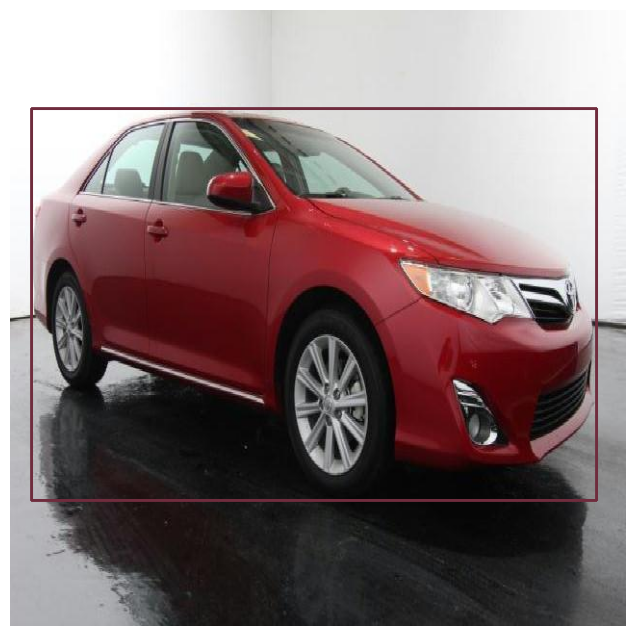

136 328 541 590


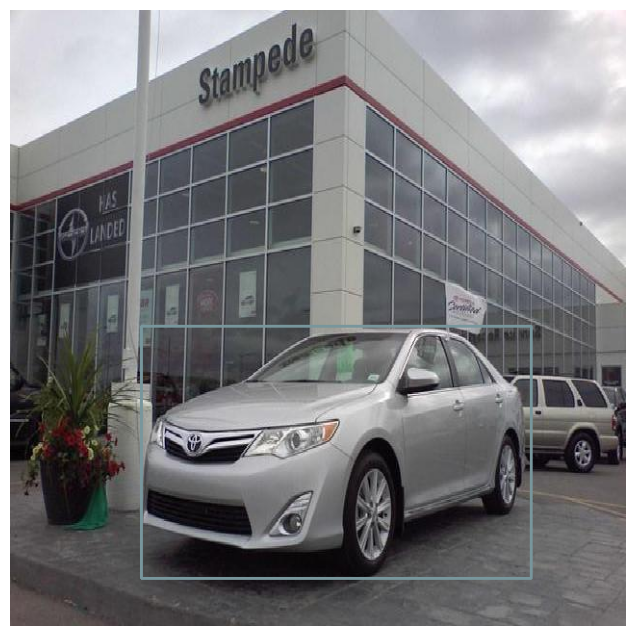

77 92 521 529


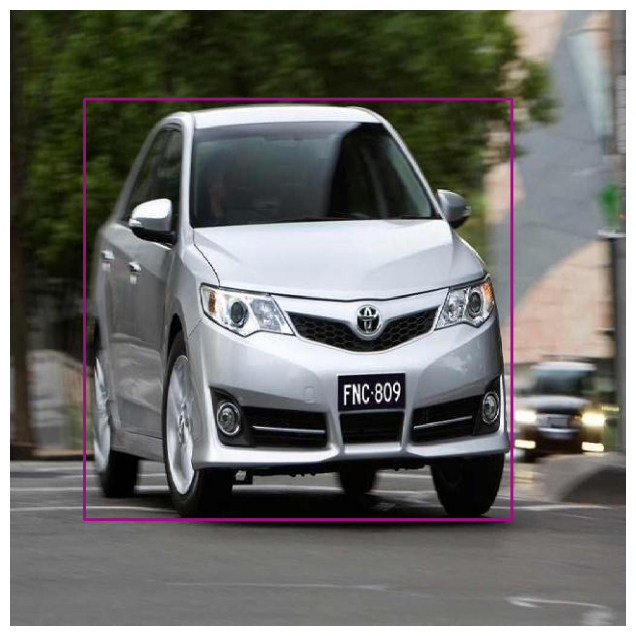

In [9]:
results_visualisation.visualize_predictions([0,1,3])

In [10]:
eval = ResultsEvaluation(results)

In [11]:
df_results = eval.get_results(data.annotation_completed)
df_results

,class,x1,y1,x2,y2,pred,pred_x1,pred_y1,pred_x2,pred_y2,IoU
0,1.0,24.000000,104.000000,608.000000,505.333333,1.0,22.157471,102.979492,609.810669,509.091553,0.982090
1,1.0,135.000000,329.333333,541.000000,596.000000,1.0,136.306870,328.714783,541.166992,590.061340,0.971944
2,1.0,39.000000,188.000000,602.000000,449.333333,1.0,36.003235,189.738541,606.725464,448.002075,0.975037
3,1.0,75.921569,94.271686,525.803922,537.348609,1.0,77.304764,92.661133,521.413391,529.338989,0.965855
4,1.0,20.400000,171.200000,606.800000,598.400000,1.0,22.123291,176.539062,601.179382,593.711304,0.964297
...,...,...,...,...,...,...,...,...,...,...,...
427,1.0,15.753846,33.224044,590.769231,538.579235,1.0,7.339600,27.980591,597.073608,548.501587,0.946633
428,1.0,57.600000,257.196262,502.400000,575.401869,1.0,56.613953,258.724243,502.178284,574.544922,0.989832
429,1.0,29.000000,33.333333,624.000000,610.666667,1.0,33.211548,31.909546,624.011414,610.369263,0.989967
430,1.0,33.750000,75.900439,571.875000,453.528551,1.0,24.403687,73.180984,574.356201,466.966614,0.938345


<Axes: >

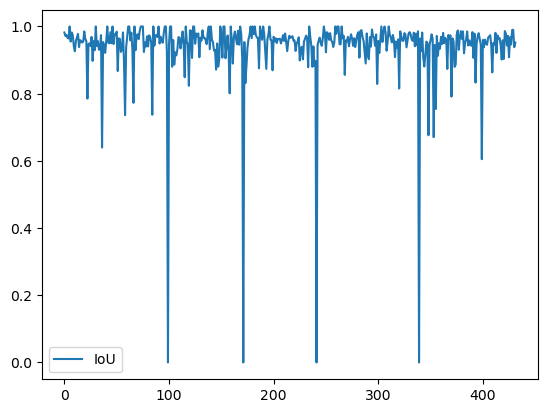

In [12]:
df_results.plot(y = "IoU")

In [13]:
df_results["IoU"].mean()

0.9403132421330846